In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve

In [125]:
bikes = pd.read_csv('./Bike-Sharing-Dataset/hour.csv')
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [126]:
bikes = bikes.drop(columns = ['instant', 'dteday', 'holiday', 'temp', 'yr', 'casual', 'registered'])
categorized_col = ['season', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
for col in categorized_col:
    bikes[col] = bikes[col].astype('category')
mean = bikes['cnt'].mean()
std = bikes['cnt'].std()
#bikes= bikes[np.abs(bikes['cnt'] - mean) <= 3*std] 

In [147]:
X = bikes[['hum','atemp', 'windspeed']]
y = bikes['cnt']
X

,hum,atemp,windspeed
0,0.81,0.2879,0.0000
1,0.80,0.2727,0.0000
2,0.80,0.2727,0.0000
3,0.75,0.2879,0.0000
4,0.75,0.2879,0.0000
...,...,...,...
17374,0.60,0.2576,0.1642
17375,0.60,0.2576,0.1642
17376,0.60,0.2576,0.1642
17377,0.56,0.2727,0.1343


In [148]:
X  = np.array(X.values.tolist())

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#We ran the grid search with C values 1,10,50,100,1000,10000 and linear, rbf and poly kernels
#kept this one in to speed up run time if you want to run it, but results will be the same
from sklearn.svm import SVR
parameters = {'kernel':['rbf'], 'C':[1000,10000]}
model = SVR()
clf = GridSearchCV(model, parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'C': 10000, 'kernel': 'rbf'}

In [150]:
r2 = []
rmsle = []


In [151]:
# Import Necessary Packages
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline


from sklearn.svm import SVR
# Define and Fit your Model
regr = make_pipeline(SVR(C=1.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred = [0 if i < 0 else i for i in y_pred]
r2 += [r2_score(y_pred,y_test)]
rmsle += [mean_squared_log_error(y_pred, y_test, squared = False)]

In [152]:
regr = make_pipeline(SVR(C=10.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred = [0 if i < 0 else i for i in y_pred]
r2 += [r2_score(y_pred,y_test)]
rmsle += [mean_squared_log_error(y_pred, y_test, squared = False)]

In [153]:
regr = make_pipeline(SVR(C=50.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred = [0 if i < 0 else i for i in y_pred]
r2 += [r2_score(y_pred,y_test)]
rmsle += [mean_squared_log_error(y_pred, y_test, squared = False)]

In [154]:
regr = make_pipeline(SVR(C=100.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred = [0 if i < 0 else i for i in y_pred]
r2 += [r2_score(y_pred,y_test)]
rmsle += [mean_squared_log_error(y_pred, y_test, squared = False)]

In [155]:
regr = make_pipeline(SVR(C=1000.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred = [0 if i < 0 else i for i in y_pred]
r2 += [r2_score(y_pred,y_test)]
rmsle += [mean_squared_log_error(y_pred, y_test, squared = False)]

In [156]:
regr = make_pipeline(SVR(C=10000.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred = [0 if i < 0 else i for i in y_pred]
r2 += [r2_score(y_pred,y_test)]
rmsle += [mean_squared_log_error(y_pred, y_test, squared = False)]
#r2_score(y_pred,y_test), mean_squared_log_error(y_pred, y_test, squared = False)

In [184]:
C = [1,10,50,100,1000,10000]
RMSLE = rmsle
R2 = r2
rmsle


[1.2535002751813638,
 1.2441742693397901,
 1.246889581774687,
 1.2464624641657196,
 1.2463918122685047,
 1.2524156559882176]

,RMSLE,R2
C,,
1,1.253500,-2.238060
10,1.244174,-1.577359
50,1.246890,-1.468199
100,1.246462,-1.478559
1000,1.246392,-1.424066
10000,1.252416,-1.407961


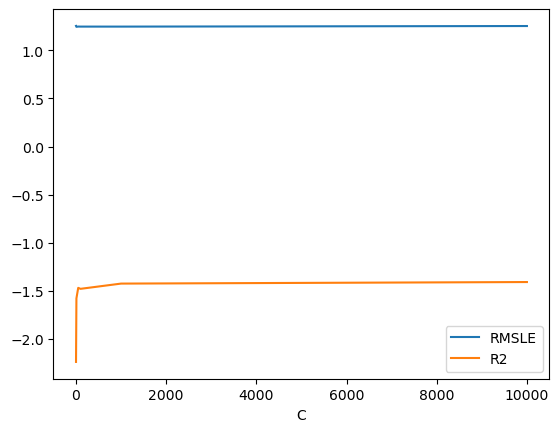

In [158]:
data = list(zip(C,RMSLE,R2))
df = pd.DataFrame(data)
df.columns = ['C','RMSLE','R2']
df = df.set_index('C')
df.plot(kind = 'line')
df

Text(0, 0.5, 'R2')

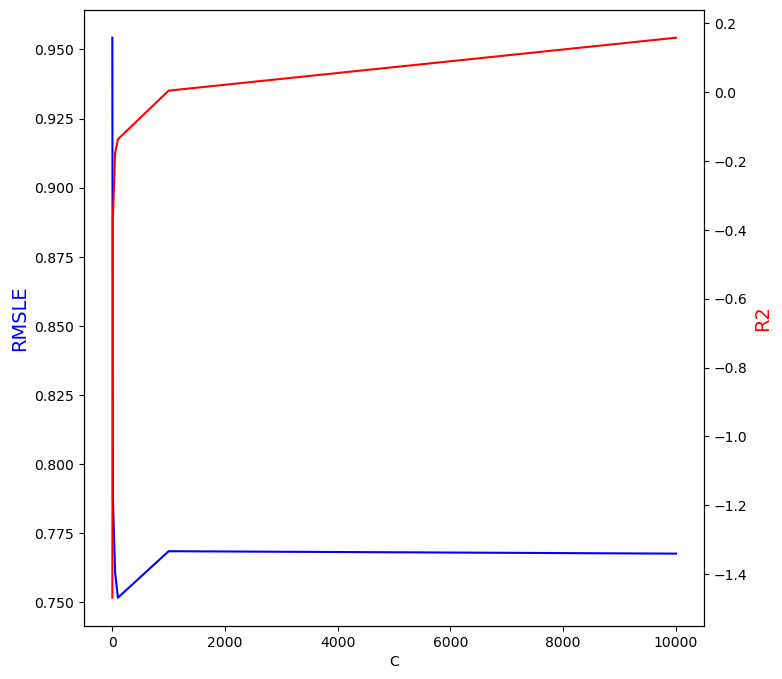

In [141]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(C, RMSLE, color = "blue")
ax2.plot(C, R2, color = "red")
ax1.set_xlabel("C")
ax1.set_ylabel("RMSLE", color="blue", fontsize=14)
ax2.set_ylabel("R2", color="red", fontsize=14)

In [165]:
import matplotlib

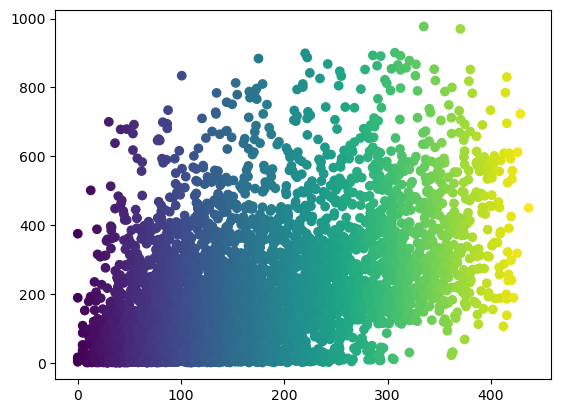

In [182]:

matplotlib.pyplot.scatter(y_pred,y_test, c = y_pred)
#plt.plot([0.1, 0.4, 0.3, 0.2])
#plt.plot(y_pred, y_test)